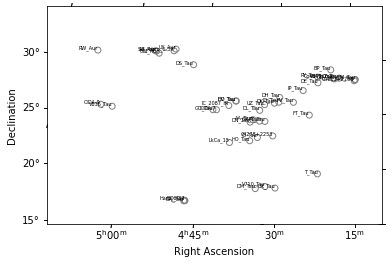

In [2]:
from astropy.io import fits
from astropy.wcs import WCS
import math
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.visualization.wcsaxes import SphericalCircle



filename = '0421p2514_1342227304_PacsPhoto_L25_HPPJSMAPB_SPG14.0.fits'
hdu = fits.open(filename)[1]
wcs = WCS(hdu.header)

# wcs = wcs.dropaxis(dropax=2)    # drop the 'FREQ' WCS axis
# wcs = wcs.dropaxis(dropax=2)    # drop the 'STOKES' WCS axis

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '15d00m00s', frame='icrs')
cr = SkyCoord('05h20m00s', '34d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)


name = 'targetname_1.txt'
file = '../ASIAA/SMA_Taurus_Auriga_Project/'+name

targ, ra, dec, sc1, sc2 = np.loadtxt(file, dtype='str', unpack=True)
x = []
y = []

# radius = 40


for j in range(len(ra)):
    c = SkyCoord(ra[j], dec[j], frame='icrs', unit='deg')
#    ax.scatter(c.ra.deg, c.dec.deg, transform=ax.get_transform('icrs'), marker = 'o', edgecolor='gray', facecolor='none')
    xl = wcs.all_world2pix(c.ra.deg, c.dec.deg, 0)[0]
    yl = wcs.all_world2pix(c.ra.deg, c.dec.deg, 0)[1]
    ax.scatter(xl, yl, marker = 'o', edgecolor='gray', facecolor='none')
    ax.annotate(targ[j], xy = (xl, yl), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
#    FOV = SphericalCircle((c.ra.deg * u.deg, c.dec.deg * u.deg), radius/3600 * u.degree, transform=ax.get_transform('icrs'), facecolor = 'none', edgecolor = 'black')  
#    ax.add_patch(FOV)
    x.append(xl)
    y.append(yl)


ax.invert_xaxis()
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'.png', dpi=1000)

[]

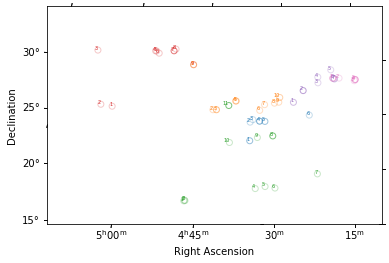

In [3]:
a1 = ['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau']
s1 = ['3', '3', '3', '3', '3', '3', '18', '3', '3']
a2 = ['DS_Tau', 'GO_Tau', 'CIDA-7', 'HV_Tau', 'DO_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau']
s2 = ['9', '3', '12', '9', '3', '3', '3', '3', '3', '6']
a3 = ['DR_Tau', 'Haro_6-37', 'DQ_Tau', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'LkCa_15', 'IC_2087_IR']
s3 = ['3', '3', '3', '3', '3', '3', '3', '18', '3', '3', '18']
a4 = ['HO_Tau', 'DN_Tau', 'AA_Tau', 'GK_Tau', 'FY_Tau', 'FT_Tau']
s4 = ['10', '3', '3', '18', '9', '3']
a5 = ['FV_Tau', 'IP_Tau', 'DE_Tau', 'RY_Tau', 'BP_Tau', 'V892_Tau', 'DD_Tau']
s5 = ['9', '18', '3', '3', '3', '3', '9']
a6 = ['CoKu_Tau_1', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau']
s6 = ['18', '3', '3', '5', '18']

a = [a1, a2, a3, a4, a5, a6]
s = [s1, s2, s3, s4, s5, s6]
p = []

for i in range(6):
    l = []
    for j in range(len(a[i])):
        id = np.where(targ == a[i][j])[0][0]
        l.append(id)
    p.append(l)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '15d00m00s', frame='icrs')
cr = SkyCoord('05h20m00s', '34d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)


c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']

for i in range(6):
    for j in range(len(p[i])):
    #    O = SphericalCircle((x[p[i][j]] * u.deg, y[p[i][j]] * u.deg), 7* u.degree, 
    #                        transform=ax.get_transform('icrs'), facecolor = c, edgecolor = c)
    #    ax.add_patch(O)
        ax.scatter(x[p[i][j]], y[p[i][j]], marker = 'o', edgecolor = c[i], facecolor='none', alpha=round(math.sqrt(float(s[i][j])/48), 2))
        ax.annotate(j+1, xy = (x[p[i][j]], y[p[i][j]]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5, color = c[i])


ax.invert_xaxis()
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_400.png', dpi=1000)
plt.plot()

[]

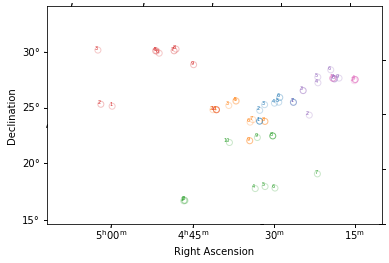

In [4]:
a1 = ['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau', 'CIDA-7']
s1 = ['3', '4', '3', '4', '3', '3', '6', '4', '4', '14']
a2 = ['CIDA-7', 'GO_Tau', 'IC_2087_IR', 'HV_Tau', 'DO_Tau', 'DN_Tau', 'AA_Tau', 'FY_Tau', 'HO_Tau']
s2 = ['7', '3', '3', '3', '3', '3', '3', '12', '12']
a3 = ['DR_Tau', 'Haro_6-37', 'DQ_Tau', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'LkCa_15']
s3 = ['3', '3', '3', '3', '3', '3', '3', '21', '3', '3']
a4 = ['GK_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau', 'FV_Tau']
s4 = ['21', '3', '3', '3', '3', '6', '9']
a5 = ['FV_Tau', 'FT_Tau', 'IP_Tau', 'DE_Tau', 'RY_Tau', 'BP_Tau', 'V892_Tau', 'DD_Tau', 'CY_Tau']
s5 = ['3', '3', '12', '3', '3', '3', '3', '12', '3']
a6 = ['CoKu_Tau_1', '04113+2758', 'CW_Tau', 'FM_Tau']
s6 = ['21', '3', '3', '21']

a = [a1, a2, a3, a4, a5, a6]
s = [s1, s2, s3, s4, s5, s6]
p = []

for i in range(6):
    l = []
    for j in range(len(a[i])):
        id = np.where(targ == a[i][j])[0][0]
        l.append(id)
    p.append(l)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '15d00m00s', frame='icrs')
cr = SkyCoord('05h20m00s', '34d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)


c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']

for i in range(6):
    for j in range(len(p[i])):
    #    O = SphericalCircle((x[p[i][j]] * u.deg, y[p[i][j]] * u.deg), 7* u.degree, 
    #                        transform=ax.get_transform('icrs'), facecolor = c, edgecolor = c)
    #    ax.add_patch(O)
        ax.scatter(x[p[i][j]], y[p[i][j]], marker = 'o', edgecolor = c[i], facecolor='none', alpha=round(math.sqrt(float(s[i][j])/48), 2))
        ax.annotate(j+1, xy = (x[p[i][j]], y[p[i][j]]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5, color = c[i])



ax.invert_xaxis()
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_230.png', dpi=1000)
plt.plot()

CIDA-9 3
RW_Aur 3
SU_Aur 3
AB_Aur 3
GM_Aur 3
Haro_6-39 18
UY_Aur 3
9
DS_Tau 12
HV_Tau 9
DO_Tau 3
IC_2087_IR 3
CIDA-7 12
GO_Tau 3
DN_Tau 3
AA_Tau 3
0
GK_Tau 18
FY_Tau 9
DL_Tau 3
UZ_Tau 3
DK_Tau 3
IQ_Tau 3
DH_Tau 6
3
FV_Tau 9
IP_Tau 18
DE_Tau 3
RY_Tau 3
15
CoKu_Tau_1 18
V892_Tau 3
DD_Tau 9
CY_Tau 3
04113+2758 3
CW_Tau 5
7
FM_Tau 18
BP_Tau 3
FT_Tau 3
04278+2253 18
CI_Tau 3
3
HO_Tau 10
LkCa_15 3
V710_Tau 3
UX_Tau 3
DM_Tau 3
T_Tau 3
DQ_Tau 3
Haro_6-37 3
DR_Tau 3
['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau', 'HV_Tau', 'DO_Tau', 'IC_2087_IR', 'CIDA-7', 'GO_Tau', 'DN_Tau', 'AA_Tau', 'GK_Tau', 'FY_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau', 'FV_Tau', 'IP_Tau', 'DE_Tau', 'RY_Tau', 'CoKu_Tau_1', 'V892_Tau', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau', 'BP_Tau', 'FT_Tau', '04278+2253', 'CI_Tau', 'HO_Tau', 'LkCa_15', 'V710_Tau', 'UX_Tau', 'DM_Tau', 'T_Tau', 'DQ_Tau', 'Haro_6-37', 'DR_Tau']


[]

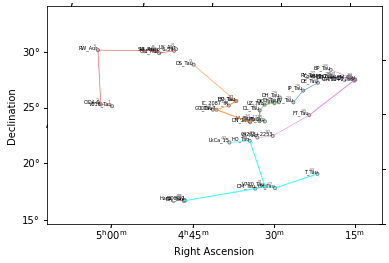

In [5]:
import numpy as np
import matplotlib.lines as lines
from scipy.spatial import KDTree


name = 'targetname_1.txt'
file = '../ASIAA/SMA_Taurus_Auriga_Project/'+name

targ, ra, dec, sc1, sc2 = np.loadtxt(file, dtype='str', unpack=True)
RA = []
Dec = []

for j in range(len(ra)):
    c = SkyCoord(ra[j], dec[j], frame='icrs', unit='deg')
    RA.append(c.ra.deg)
    Dec.append(c.dec.deg)


tree = KDTree(np.c_[RA, Dec])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '15d00m00s', frame='icrs')
cr = SkyCoord('05h20m00s', '34d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)

for i in range(len(x)):
    ax.scatter(x[i], y[i], marker = '.', edgecolor='gray', facecolor='none')
    ax.annotate(targ[i], xy = (x[i], y[i]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)

c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink', 'cyan']
k = 0
p = 0

u = 17
d = 0
sc = int(sc1[u])
ii = [u]
tt = [targ[u]]
for i in range(46):
    dis, idx = tree.query([RA[u], Dec[u]], k=[2])
    j = 1
    while (np.where(ii == idx[0])[0].size > 0):
        dis, idx = tree.query([RA[u], Dec[u]], k=[2+j])
        j = j + 1
    if (p):
        disl, idxl = tree.query([RA[ii[i-1]], Dec[ii[i-1]]], k=[2])
        j = 1
        while (np.where(ii == idxl[0])[0].size > 0):
            disl, idxl = tree.query([RA[ii[i-1]], Dec[ii[i-1]]], k=[2+j])
            j = j + 1
    else: disl = dis
    
    if (disl < dis):
        dis = disl
        idx = idxl
        if (int(48-sc) < int(sc1[idx[0]])):
            print(48-sc)
            sc = 0
            k = k + 1
            p = 0
        else: 
            l = lines.Line2D([RA[ii[i-1]], RA[idx[0]]], [Dec[ii[i-1]], Dec[idx[0]]], transform=ax.get_transform('icrs'), 
                             figure=fig, c=c[k], lw=1, alpha=0.8)
            fig.lines.extend([l])
            p = 1
    else: 
        
        if (int(48-sc) < int(sc2[idx[0]])):
            print(48-sc)
            sc = 0
            k = k + 1
            p = 0
            
        else:
            l = lines.Line2D([RA[ii[i]], RA[idx[0]]], [Dec[ii[i]], Dec[idx[0]]], transform=ax.get_transform('icrs'), 
                        figure=fig, c=c[k], lw=0.6, alpha=0.8)
            fig.lines.extend([l])
            p = 1
    
    sc = sc + int(sc1[idx[0]])
    ax.annotate(i+1, xy = (x[u], y[u]), xytext = (-2, 2), textcoords = 'offset points', c='grey', ha='right', va='bottom', size = 5)
    u = idx[0]
    print(targ[u], int(sc1[u]))
    d = d + dis
    ii.append(u)
    tt.append(targ[u])

print(tt)    


ax.invert_xaxis()
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_230.png', dpi=1000)
plt.plot()


['DR_Tau', 'DQ_Tau', 'Haro_6-37', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'HO_Tau', 'LkCa_15', 'DN_Tau', 'AA_Tau', 'GK_Tau', 'FY_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau', 'FV_Tau', 'IP_Tau', 'DE_Tau', 'RY_Tau', 'CoKu_Tau_1', 'V892_Tau', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau', 'BP_Tau', 'FT_Tau', 'DO_Tau', 'HV_Tau', 'IC_2087_IR', 'CIDA-7', 'GO_Tau', 'DS_Tau', 'Haro_6-39', 'UY_Aur', 'GM_Aur', 'AB_Aur', 'SU_Aur', 'RW_Aur', 'CIDA-9', 'V836_Tau']


[]

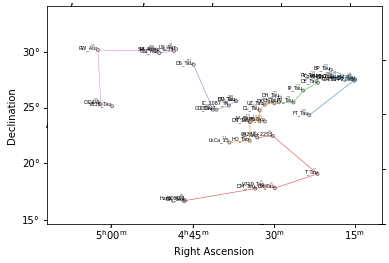

In [6]:
import numpy as np
import matplotlib.lines as lines
from scipy.spatial import KDTree


name = 'targetname_1.txt'
file = '../ASIAA/SMA_Taurus_Auriga_Project/'+name

targ, ra, dec, sc1, sc2 = np.loadtxt(file, dtype='str', unpack=True)
RA = []
Dec = []

for j in range(len(ra)):
    c = SkyCoord(ra[j], dec[j], frame='icrs', unit='deg')
    RA.append(c.ra.deg)
    Dec.append(c.dec.deg)


tree = KDTree(np.c_[RA, Dec])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '15d00m00s', frame='icrs')
cr = SkyCoord('05h20m00s', '34d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)

for i in range(len(x)):
    ax.scatter(x[i], y[i], marker = '.', edgecolor='gray', facecolor='none')
    ax.annotate(targ[i], xy = (x[i], y[i]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)

c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']
k = 0

u = 40
d = 0
sc = int(sc1[u])
ii = [u]
tt = [targ[u]]
disl = [100]
disll = [100]

for i in range(46):
    dis, idx = tree.query([RA[u], Dec[u]], k=[2])
    j = 1
    while (np.where(ii == idx[0])[0].size > 0):
        dis, idx = tree.query([RA[u], Dec[u]], k=[2+j])
        j = j + 1
    if (i > 0):
        disl, idxl = tree.query([RA[ii[i-1]], Dec[ii[i-1]]], k=[2])
        j = 1
        while (np.where(ii == idxl[0])[0].size > 0):
            disl, idxl = tree.query([RA[ii[i-1]], Dec[ii[i-1]]], k=[2+j])
            j = j + 1
    if (i > 1):
        disll, idxll = tree.query([RA[ii[i-2]], Dec[ii[i-2]]], k=[2])
        j = 1
        while (np.where(ii == idxll[0])[0].size > 0):
            disll, idxll = tree.query([RA[ii[i-1]], Dec[ii[i-1]]], k=[2+j])
            j = j + 1
    
    if (disl < dis):
        if (disll < disl):
            dis = disll
            idx = idxll
            sc = sc + int(sc1[idx[0]])
            if (sc > 48):
                sc = 0
                k = k + 1
            else: 
                l = lines.Line2D([RA[ii[i-2]], RA[idx[0]]], [Dec[ii[i-2]], Dec[idx[0]]], transform=ax.get_transform('icrs'), 
                                 figure=fig, c=c[k], lw=1, alpha=0.8)
                fig.lines.extend([l])
        else:
            dis = disl
            idx = idxl
            sc = sc + int(sc1[idx[0]])
            if (sc > 48):
                sc = 0
                k = k + 1
            else:
                l = lines.Line2D([RA[ii[i-1]], RA[idx[0]]], [Dec[ii[i-1]], Dec[idx[0]]], transform=ax.get_transform('icrs'), 
                                figure=fig, c=c[k], lw=0.6, alpha=0.8)
                fig.lines.extend([l])
    else: 
        sc = sc + int(sc1[idx[0]])
        if (sc > 48):
            sc = 0
            k = k + 1
        else:
            l = lines.Line2D([RA[ii[i]], RA[idx[0]]], [Dec[ii[i]], Dec[idx[0]]], transform=ax.get_transform('icrs'), 
                        figure=fig, c=c[k], lw=0.6, alpha=0.8)
            fig.lines.extend([l])
    
    ax.annotate(i+1, xy = (x[u], y[u]), xytext = (-2, 2), textcoords = 'offset points', c='grey', ha='right', va='bottom', size = 5)
    u = idx[0]
    d = d + dis
    ii.append(u)
    tt.append(targ[u])

print(tt)    


ax.invert_xaxis()
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_tree_40_1.png', dpi=1000)
plt.plot()


CIDA-9 3
RW_Aur 3
SU_Aur 3
AB_Aur 3
GM_Aur 3
Haro_6-39 18
UY_Aur 3
HV_Tau 9
0
DO_Tau 3
IC_2087_IR 3
CIDA-7 12
GO_Tau 3
DN_Tau 3
AA_Tau 3
GK_Tau 18
DL_Tau 3
0
FY_Tau 9
04278+2253 18
CI_Tau 3
HO_Tau 10
LkCa_15 3
UZ_Tau 3
2
DK_Tau 3
IQ_Tau 3
DH_Tau 6
FV_Tau 9
IP_Tau 18
DE_Tau 3
RY_Tau 3
V892_Tau 3
0
CoKu_Tau_1 18
DD_Tau 9
CY_Tau 3
04113+2758 3
CW_Tau 5
BP_Tau 3
FT_Tau 3
T_Tau 3
1
UX_Tau 3
V710_Tau 3
DM_Tau 3
DQ_Tau 3
Haro_6-37 3
DR_Tau 3
DS_Tau 12
FM_Tau 18
0
['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'HV_Tau', 'DO_Tau', 'IC_2087_IR', 'CIDA-7', 'GO_Tau', 'DN_Tau', 'AA_Tau', 'GK_Tau', 'DL_Tau', 'FY_Tau', '04278+2253', 'CI_Tau', 'HO_Tau', 'LkCa_15', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau', 'FV_Tau', 'IP_Tau', 'DE_Tau', 'RY_Tau', 'V892_Tau', 'CoKu_Tau_1', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'BP_Tau', 'FT_Tau', 'T_Tau', 'UX_Tau', 'V710_Tau', 'DM_Tau', 'DQ_Tau', 'Haro_6-37', 'DR_Tau', 'DS_Tau', 'FM_Tau']


[]

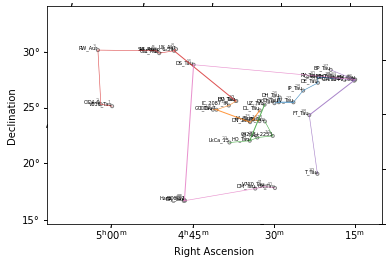

In [7]:
import numpy as np
import matplotlib.lines as lines
from scipy.spatial import KDTree


name = 'targetname_1.txt'
file = '../ASIAA/SMA_Taurus_Auriga_Project/'+name

targ, ra, dec, sc1, sc2 = np.loadtxt(file, dtype='str', unpack=True)
RA = []
Dec = []

for j in range(len(ra)):
    c = SkyCoord(ra[j], dec[j], frame='icrs', unit='deg')
    RA.append(c.ra.deg)
    Dec.append(c.dec.deg)


tree = KDTree(np.c_[RA, Dec])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '15d00m00s', frame='icrs')
cr = SkyCoord('05h20m00s', '34d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)

for i in range(len(x)):
    ax.scatter(x[i], y[i], marker = '.', edgecolor='gray', facecolor='none')
    ax.annotate(targ[i], xy = (x[i], y[i]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)

c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']
k = 0
j = 1
p = 1

u = 17
d = 0
sc = int(sc1[u])
ii = [u]
tt = [targ[u]]
for i in range(46):
    dis, idx = tree.query([RA[u], Dec[u]], k=[2])
    m = 1
    while (np.where(ii == idx[0])[0].size > 0 or (48-sc) < int(sc1[idx[0]])):
        dis, idx = tree.query([RA[u], Dec[u]], k=[2+m])
        m = m + 1
    if (p == 1):
        disl, idxl = tree.query([RA[ii[i-1]], Dec[ii[i-1]]], k=[2])
        n = 1
        while (np.where(ii == idxl[0])[0].size > 0 or (48-sc) < int(sc1[idxl[0]])):
            disl, idxl = tree.query([RA[ii[i-1]], Dec[ii[i-1]]], k=[2+n])   
            n = n + 1
    else:
        disl = dis
        p = 1

    if (disl < dis):
        dis = disl
        idx = idxl
        if (j):
            l = lines.Line2D([RA[ii[i-1]], RA[idx[0]]], [Dec[ii[i-1]], Dec[idx[0]]], transform=ax.get_transform('icrs'), 
                            figure=fig, c=c[k], lw=1, alpha=0.8)
            fig.lines.extend([l])
        else:
            j = 1
            p = 0
    else:
        if (j):
            l = lines.Line2D([RA[ii[i]], RA[idx[0]]], [Dec[ii[i]], Dec[idx[0]]], transform=ax.get_transform('icrs'), 
                            figure=fig, c=c[k], lw=0.6, alpha=0.8)
            fig.lines.extend([l])
        else:
            j = 1
            p = 0
    
    ax.annotate(i+1, xy = (x[u], y[u]), xytext = (-2, 2), textcoords = 'offset points', c='grey', ha='right', va='bottom', size = 5)
    u = idx[0]
    d = d + dis
    sc = sc + int(sc1[u])
    print(targ[u], int(sc1[u]))
    if ((48-sc) < 3):
        print(48-sc)
        sc = 0
        k = k + 1
        j = 0
    ii.append(u)
    tt.append(targ[u])

print(tt)    



ax.invert_xaxis()
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_tree_17_2.png', dpi=1000)
plt.plot()


CIDA-9_0 3
RW_Aur_0 3
SU_Aur_0 3
AB_Aur_0 3
GM_Aur_0 3
Haro_6-39_1 3
Haro_6-39_4 3
Haro_6-39_3 3
Haro_6-39_5 3
Haro_6-39_0 3
Haro_6-39_2 3
UY_Aur_0 3
DS_Tau_1 3
DS_Tau_2 3
DS_Tau_3 3
0
DS_Tau_0 3
HV_Tau_1 3
HV_Tau_0 3
HV_Tau_2 3
DO_Tau_0 3
IC_2087_IR_0 3
CIDA-7_3 3
CIDA-7_1 3
CIDA-7_2 3
CIDA-7_0 3
GO_Tau_0 3
DN_Tau_0 3
AA_Tau_0 3
GK_Tau_1 3
GK_Tau_5 3
GK_Tau_2 3
0
GK_Tau_4 3
GK_Tau_0 3
GK_Tau_3 3
FY_Tau_1 3
FY_Tau_0 3
FY_Tau_2 3
DL_Tau_0 3
UZ_Tau_0 3
DK_Tau_0 3
IQ_Tau_0 3
DH_Tau_1 3
DH_Tau_0 3
FV_Tau_2 3
FV_Tau_1 3
FV_Tau_0 3
IP_Tau_2 3
0
IP_Tau_3 3
IP_Tau_4 3
IP_Tau_1 3
IP_Tau_0 3
IP_Tau_5 3
DE_Tau_0 3
RY_Tau_0 3
CoKu_Tau_1_4 3
CoKu_Tau_1_0 3
CoKu_Tau_1_2 3
CoKu_Tau_1_5 3
CoKu_Tau_1_3 3
CoKu_Tau_1_1 3
V892_Tau_0 3
DD_Tau_1 3
DD_Tau_0 3
0
DD_Tau_2 3
CY_Tau_0 3
04113+2758_0 3
CW_Tau_0 3
CW_Tau_1 2
FM_Tau_5 3
FM_Tau_3 3
FM_Tau_1 3
FM_Tau_4 3
FM_Tau_2 3
FM_Tau_0 3
BP_Tau_0 3
FT_Tau_0 3
04278+2253_4 3
04278+2253_3 3
04278+2253_5 3
1
04278+2253_0 3
04278+2253_2 3
04278+2253_1 3
CI_Tau_0 3
H

[]

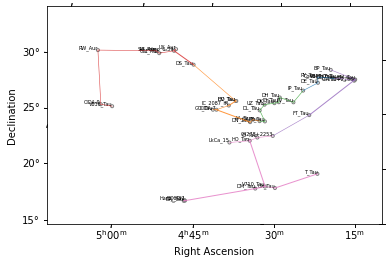

In [8]:
import numpy as np
import matplotlib.lines as lines
from scipy.spatial import KDTree


name = 'targetname_1.txt'
file = '../ASIAA/SMA_Taurus_Auriga_Project/'+name

targ, ra, dec, sc1, sc2 = np.loadtxt(file, dtype='str', unpack=True)
Targ = []
R = []
D = []
Sc = []

for j in range(len(ra)):
    c = SkyCoord(ra[j], dec[j], frame='icrs', unit='deg')
    if (int(sc1[j]) > 3): 
        for i in range(math.floor(int(sc1[j])/3)):
            Targ.append(targ[j]+'_'+str(i))
            R.append(c.ra.deg)
            D.append(c.dec.deg)
            Sc.append(3)
        if (int(sc1[j])%3 != 0):
            Targ.append(targ[j]+'_'+str(i+1))
            R.append(c.ra.deg)
            D.append(c.dec.deg)
            Sc.append(int(sc1[j])%3)
    else: 
        Targ.append(targ[j]+'_0')
        R.append(c.ra.deg)
        D.append(c.dec.deg)
        Sc.append(int(sc1[j]))


tree = KDTree(np.c_[R, D])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '15d00m00s', frame='icrs')
cr = SkyCoord('05h20m00s', '34d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)

for i in range(len(x)):
    ax.scatter(x[i], y[i], marker = '.', edgecolor='gray', facecolor='none')
    ax.annotate(targ[i], xy = (x[i], y[i]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)

c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']
k = 0
j = 1
p = 0

# u = 67
# u = 91

u = 66
# u = 89

dd = 0
sc = int(Sc[u])
ii = [u]
tt = [Targ[u]]
l = len(R)

for i in range(l):
    dis, idx = tree.query([R[u], D[u]], k=96)
    for m in range(96):
        if (np.where(ii == idx[m])[0].size == 0 and (48-sc) >= int(Sc[idx[m]])):
            u = idx[m]
            d = dis[m]
            break
    
    if (p == 1):
        disl, idxl = tree.query([R[ii[i-1]], D[ii[i-1]]], k=96)
        for n in range(96):
            if (np.where(ii == idxl[n])[0].size == 0 and (48-sc) >= int(Sc[idxl[n]])):
                ul = idxl[n]
                dl = disl[n]
                break
    else:
        dl = d
        p = 1
    
    if (dl < d):
        d = dl
        u = ul
        if (j):
            l = lines.Line2D([R[ii[i-1]], R[u]], [D[ii[i-1]], D[u]], transform=ax.get_transform('icrs'), 
                            figure=fig, c=c[k], lw=1, alpha=0.8)
            fig.lines.extend([l])
        else:
            j = 1
            p = 0
    else:
        if (j):
            l = lines.Line2D([R[ii[i]], R[u]], [D[ii[i]], D[u]], transform=ax.get_transform('icrs'), 
                            figure=fig, c=c[k], lw=0.6, alpha=0.8)
            fig.lines.extend([l])
        else:
            j = 1
            p = 0
#    ax.annotate(i+1, xy = (x[u], y[u]), xytext = (-2, 2), textcoords = 'offset points', c='grey', ha='right', va='bottom', size = 5)
    dd = dd + dis
    print(Targ[u], int(Sc[u]))
    sc = sc + int(Sc[u])
    if ((48-sc) < 3):
        print(48-sc)
        sc = 0
        k = k + 1
        j = 0
    ii.append(u)
    tt.append(Targ[u])

print(tt)    


ax.invert_xaxis()
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_tree_17_3.png', dpi=1000)
plt.plot()


48 46 48 48 47 45
04h57m13.4243s +29d17m34.1289s
04h40m07.4951s +25d37m28.1362s
04h32m12.5154s +25d23m01.3018s
04h22m30.0331s +27d26m13.918s
04h16m39.1243s +28d15m15.0592s
04h36m16.8502s +19d21m04.6441s


[]

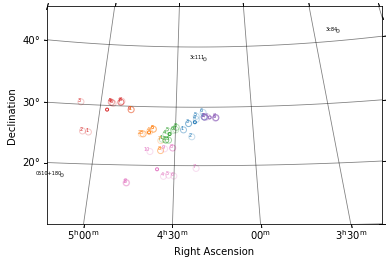

In [39]:
a1 = ['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau']
s1 = [3, 3, 3, 3, 3, 3, 18, 3, 9]
a2 = ['DS_Tau', 'GO_Tau', 'CIDA-7', 'IC_2087_IR', 'HV_Tau', 'DO_Tau', 'DN_Tau', 'HO_Tau']
s2 = [3, 3, 12, 3, 9, 3, 3, 10]
a3 = ['AA_Tau', 'GK_Tau', 'FY_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau']
s3 = [3, 18, 9, 3, 3, 3, 3, 6]
a4 = ['FV_Tau', 'FT_Tau','IP_Tau', 'DE_Tau', 'RY_Tau', 'BP_Tau', 'CoKu_Tau_1']
s4 = [9, 3, 15, 3, 3, 3, 12]
a5 = ['CoKu_Tau_1', 'V892_Tau', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau']
s5 = [6, 3, 9, 3, 3, 5, 18]
a6 = ['DR_Tau', 'Haro_6-37', 'DQ_Tau', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'LkCa_15',]
s6 = [3, 3, 3, 3, 3, 3, 3, 18, 3, 3]

a = [a1, a2, a3, a4, a5, a6]
s = [s1, s2, s3, s4, s5, s6]
p = []

print(sum(s1), sum(s2), sum(s3), sum(s4), sum(s5), sum(s6))

for i in range(6):
    l = []
    for j in range(len(a[i])):
        id = np.where(targ == a[i][j])[0][0]
        l.append(id)
    p.append(l)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('03h20m00s', '10d00m00s', frame='icrs')
cr = SkyCoord('05h30m00s', '45d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)

c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']

for i in range(6):
    a = 0
    b = 0
    for j in range(len(p[i])):
    #    O = SphericalCircle((x[p[i][j]] * u.deg, y[p[i][j]] * u.deg), 7* u.degree, 
    #                        transform=ax.get_transform('icrs'), facecolor = c, edgecolor = c)
    #    ax.add_patch(O)
        ax.scatter(x[p[i][j]], y[p[i][j]], marker = 'o', edgecolor = c[i], facecolor='none', alpha=round(math.sqrt(float(s[i][j])/48), 2))
        ax.annotate(j+1, xy = (x[p[i][j]], y[p[i][j]]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5, color = c[i])
        a = a + RA[p[i][j]]
        b = b + Dec[p[i][j]]
    coor = SkyCoord(a/len(p[i]), b/len(p[i]), frame='icrs', unit='deg')
    print(coor.to_string('hmsdms'))    
#    al = wcs.all_world2pix(a/len(p[i]), b/len(p[i]), 0)[0]
#    bl = wcs.all_world2pix(a/len(p[i]), b/len(p[i]), 0)[1]
    ax.scatter(a/len(p[i]), b/len(p[i]), transform=ax.get_transform('icrs'),  marker = '.', edgecolor = c[i], facecolor='none')
#    ax.annotate(i+1, xy = (a/len(p[i]), b/len(p[i])), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', 
#                size = 5, color = c[i])

cal0 = SkyCoord('05h10m02.369s', '18d00m41.58s', frame='icrs')
ax.scatter(cal0.ra.deg, cal0.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('0510+180', xy = (wcs.all_world2pix(cal0.ra.deg, cal0.dec.deg, 0)[0], wcs.all_world2pix(cal0.ra.deg, cal0.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
cal1 = SkyCoord('04h18m21.277s', '38d01m35.80s', frame='icrs')
ax.scatter(cal1.ra.deg, cal1.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('3c111', xy = (wcs.all_world2pix(cal1.ra.deg, cal1.dec.deg, 0)[0], wcs.all_world2pix(cal1.ra.deg, cal1.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
cal = SkyCoord('03h19m48.160s', '41d30m42.10s', frame='icrs')
ax.scatter(cal.ra.deg, cal.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('3c84', xy = (wcs.all_world2pix(cal.ra.deg, cal.dec.deg, 0)[0], wcs.all_world2pix(cal.ra.deg, cal.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)


ax.invert_xaxis()
ax.coords.grid(True, color='black',ls='solid',alpha=0.5)
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_17_400.png', dpi=1000)
plt.plot()

48 49 48 48 48 48
04h55m44.1845s +28d53m52.115s
04h38m12.7432s +24d59m18.913s
04h31m30.3849s +25d36m23.4162s
04h23m02.3978s +27d09m31.8192s
04h16m42.604s +28d21m49.4041s
04h36m16.8502s +19d21m04.6441s


[]

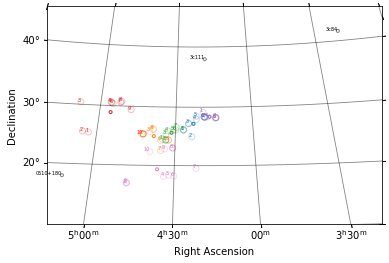

In [40]:
a1 = ['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau', 'CIDA-7']
s1 = [3, 4, 3, 4, 3, 3, 6, 4, 4, 14]
a2 = ['GO_Tau', 'CIDA-7', 'IC_2087_IR', 'HV_Tau', 'DO_Tau', 'DN_Tau', 'HO_Tau', 'FY_Tau']
s2 = [3, 7, 3, 3, 3, 3, 3, 12, 12]
a3 = ['AA_Tau', 'GK_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau', 'FV_Tau']
s3 = [3, 21, 3, 3, 3, 3, 6, 6]
a4 = ['FV_Tau', 'FT_Tau', 'IP_Tau', 'DE_Tau', 'RY_Tau', 'CoKu_Tau_1']
s4 = [6, 3, 12, 3, 3, 21]
a5 = ['BP_Tau', 'V892_Tau', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau']
s5 = [3, 3, 12, 3, 3, 3, 21]
a6 = ['DR_Tau', 'Haro_6-37', 'DQ_Tau', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'LkCa_15']
s6 = [3, 3, 3, 3, 3, 3, 3, 21, 3, 3]

a = [a1, a2, a3, a4, a5, a6]
s = [s1, s2, s3, s4, s5, s6]
p = []

print(sum(s1), sum(s2), sum(s3), sum(s4), sum(s5), sum(s6))

for i in range(6):
    l = []
    for j in range(len(a[i])):
        id = np.where(targ == a[i][j])[0][0]
        l.append(id)
    p.append(l)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('03h20m00s', '10d00m00s', frame='icrs')
cr = SkyCoord('05h30m00s', '45d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)


c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']

for i in range(6):
    a = 0
    b = 0
    for j in range(len(p[i])):
    #    O = SphericalCircle((x[p[i][j]] * u.deg, y[p[i][j]] * u.deg), 7* u.degree, 
    #                        transform=ax.get_transform('icrs'), facecolor = c, edgecolor = c)
    #    ax.add_patch(O)
        ax.scatter(x[p[i][j]], y[p[i][j]], marker = 'o', edgecolor = c[i], facecolor='none', alpha=round(math.sqrt(float(s[i][j])/48), 2))
        ax.annotate(j+1, xy = (x[p[i][j]], y[p[i][j]]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5, color = c[i])
        a = a + RA[p[i][j]]
        b = b + Dec[p[i][j]]
    coor = SkyCoord(a/len(p[i]), b/len(p[i]), frame='icrs', unit='deg')
    print(coor.to_string('hmsdms'))
#    al = wcs.all_world2pix(a/len(p[i]), b/len(p[i]), 0)[0]
#    bl = wcs.all_world2pix(a/len(p[i]), b/len(p[i]), 0)[1]
    ax.scatter(a/len(p[i]), b/len(p[i]), transform=ax.get_transform('icrs'),  marker = '.', edgecolor = c[i], facecolor='none')
#    ax.annotate(i+1, xy = (a/len(p[i]), b/len(p[i])), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', 
#                size = 5, color = c[i])
cal0 = SkyCoord('05h10m02.369s', '18d00m41.58s', frame='icrs')
ax.scatter(cal0.ra.deg, cal0.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('0510+180', xy = (wcs.all_world2pix(cal0.ra.deg, cal0.dec.deg, 0)[0], wcs.all_world2pix(cal0.ra.deg, cal0.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
cal1 = SkyCoord('04h18m21.277s', '38d01m35.80s', frame='icrs')
ax.scatter(cal1.ra.deg, cal1.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('3c111', xy = (wcs.all_world2pix(cal1.ra.deg, cal1.dec.deg, 0)[0], wcs.all_world2pix(cal1.ra.deg, cal1.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
cal = SkyCoord('03h19m48.160s', '41d30m42.10s', frame='icrs')
ax.scatter(cal.ra.deg, cal.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('3c84', xy = (wcs.all_world2pix(cal.ra.deg, cal.dec.deg, 0)[0], wcs.all_world2pix(cal.ra.deg, cal.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)


ax.invert_xaxis()
ax.coords.grid(True, color='black',ls='solid',alpha=0.5)
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_17_230.png', dpi=1000)
plt.plot()

In [41]:
name = 'targetname_1.txt'
file = '../ASIAA/SMA_Taurus_Auriga_Project/'+name

targ, ra, dec, sc1, sc2 = np.loadtxt(file, dtype='str', unpack=True)

a1 = ['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau']
s1 = [3, 3, 3, 3, 3, 3, 18, 3, 9]
a2 = ['DS_Tau', 'GO_Tau', 'CIDA-7', 'IC_2087_IR', 'HV_Tau', 'DO_Tau', 'DN_Tau', 'HO_Tau']
s2 = [3, 3, 12, 3, 9, 3, 3, 10]
a3 = ['AA_Tau', 'GK_Tau', 'FY_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau']
s3 = [3, 18, 9, 3, 3, 3, 3, 6]
a4 = ['FV_Tau', 'FT_Tau','IP_Tau', 'DE_Tau', 'RY_Tau', 'BP_Tau', 'CoKu_Tau_1']
s4 = [9, 3, 15, 3, 3, 3, 12]
a5 = ['CoKu_Tau_1', 'V892_Tau', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau']
s5 = [6, 3, 9, 3, 3, 5, 18]
a6 = ['DR_Tau', 'Haro_6-37', 'DQ_Tau', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'LkCa_15']
s6 = [3, 3, 3, 3, 3, 3, 3, 18, 3, 3]

a = [a1, a2, a3, a4, a5, a6]
s = [s1, s2, s3, s4, s5, s6]
p = []

for i in range(6):
    l = []
    for j in range(len(a[i])):
        id = np.where(targ == a[i][j])[0][0]
        l.append(id)
    p.append(l)


for j in range(len(ra)):
    ra_h = ra[j].split("h")[0]
    ra_m = ra[j].split("h")[1].split("m")[0]
    ra_s = ra[j].split("h")[1].split("m")[1].split("s")[0]
    dec_d = dec[j][1:].split("d")[0]
    dec_m = dec[j].split("d")[1].split("m")[0]
    dec_s = dec[j].split("d")[1].split("m")[1].split("s")[0]
    print('$targ'+str(j)+'="'+targ[j]+' -r '+ra_h+':'+ra_m+':'+ra_s+' -d '+dec_d+':'+dec_m+':'+dec_s+' -e 2000 -v 0"; $ntarg'
          +str(j)+'="'+str(sc1[j])+'";')
# remember to split 'DS_Tau', 'CoKu_Tau_1' into two targets; remember to change the scans of 'IP_Tau' to '15'

print('')
for i in [0, 1, 2, 5, 3, 4]:
    if (i == 3 or i == 4 ):
        print('cal1,', end = " ")
        for j in range(len(a[i])):
            print('targ'+str(p[i][j])+',', end = " ")
    else:
        print('cal0,', end = " ")
        for j in range(len(a[i])):
            print('targ'+str(p[i][j])+',', end = " ")
# remember to add calibrators between different groups; remember to change the target name of 'DS_Tau', 'CoKu_Tau_1' in the second scan

for i in [0, 1, 2, 5, 3, 4]:
    if (i == 3 or i == 4 ):
        print('cal1,', end = " ")
        for j in range(len(a[i])):
            print(targ[p[i][j]]+',', end = " ")
    else:
        print('cal0,', end = " ")
        for j in range(len(a[i])):
            print(targ[p[i][j]]+',', end = " ")

print('')
for i in [4, 3, 2, 5, 1, 0]:
    if (i == 3 or i == 4 ):
        print('cal1,', end = " ")
        for j in range(len(a[i])):
            print('targ'+str(p[i][len(a[i])-j-1])+',', end = " ")
    else:
        print('cal0,', end = " ")
        for j in range(len(a[i])):
            print('targ'+str(p[i][len(a[i])-j-1])+',', end = " ")
# remember to add calibrators between different groups; remember to change the target name of 'DS_Tau', 'CoKu_Tau_1' in the second scan

$targ0="FM_Tau -r 04:14:13.5943 -d 28:12:48.7763 -e 2000 -v 0"; $ntarg0="18";
$targ1="GK_Tau -r 04:33:34.5718 -d 24:21:05.527 -e 2000 -v 0"; $ntarg1="18";
$targ2="IP_Tau -r 04:24:57.0924 -d 27:11:56.1153 -e 2000 -v 0"; $ntarg2="18";
$targ3="CoKu_Tau_1 -r 04:18:51.487 -d 28:20:26.0964 -e 2000 -v 0"; $ntarg3="18";
$targ4="04278+2253 -r 04:30:50.2913 -d 23:00:08.5211 -e 2000 -v 0"; $ntarg4="18";
$targ5="Haro_6-39 -r 04:52:09.708 -d 30:37:45.02 -e 2000 -v 0"; $ntarg5="18";
$targ6="CIDA-7 -r 04:42:21.0271 -d 25:20:33.9896 -e 2000 -v 0"; $ntarg6="12";
$targ7="DS_Tau -r 04:47:48.6017 -d 29:25:10.8006 -e 2000 -v 0"; $ntarg7="12";
$targ8="HO_Tau -r 04:35:20.2217 -d 22:32:14.291 -e 2000 -v 0"; $ntarg8="10";
$targ9="FY_Tau -r 04:32:30.5864 -d 24:19:57.0152 -e 2000 -v 0"; $ntarg9="9";
$targ10="HV_Tau -r 04:38:35.2962 -d 26:10:38.2981 -e 2000 -v 0"; $ntarg10="9";
$targ11="FV_Tau -r 04:26:53.5421 -d 26:06:53.9302 -e 2000 -v 0"; $ntarg11="9";
$targ12="DD_Tau -r 04:18:31.1378 -d 28:16:28.7496 -e 2000 

In [42]:
name = 'targetname_1.txt'
file = '../ASIAA/SMA_Taurus_Auriga_Project/'+name

targ, ra, dec, sc1, sc2 = np.loadtxt(file, dtype='str', unpack=True)

a1 = ['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau', 'CIDA-7']
s1 = [3, 4, 3, 4, 3, 3, 6, 4, 4, 14]
a2 = ['GO_Tau', 'CIDA-7', 'IC_2087_IR', 'HV_Tau', 'DO_Tau', 'DN_Tau', 'HO_Tau', 'FY_Tau']
s2 = [3, 7, 3, 3, 3, 3, 3, 12, 12]
a3 = ['AA_Tau', 'GK_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau', 'FV_Tau']
s3 = [3, 21, 3, 3, 3, 3, 6, 6]
a4 = ['FV_Tau', 'FT_Tau', 'IP_Tau', 'DE_Tau', 'RY_Tau', 'CoKu_Tau_1']
s4 = [6, 3, 12, 3, 3, 21]
a5 = ['BP_Tau', 'V892_Tau', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau']
s5 = [3, 3, 12, 3, 3, 3, 21]
a6 = ['DR_Tau', 'Haro_6-37', 'DQ_Tau', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'LkCa_15']
s6 = [3, 3, 3, 3, 3, 3, 3, 21, 3, 3]

a = [a1, a2, a3, a4, a5, a6]
s = [s1, s2, s3, s4, s5, s6]
p = []

for i in range(6):
    l = []
    for j in range(len(a[i])):
        id = np.where(targ == a[i][j])[0][0]
        l.append(id)
    p.append(l)


for j in range(len(ra)):
    ra_h = ra[j].split("h")[0]
    ra_m = ra[j].split("h")[1].split("m")[0]
    ra_s = ra[j].split("h")[1].split("m")[1].split("s")[0]
    dec_d = dec[j][1:].split("d")[0]
    dec_m = dec[j].split("d")[1].split("m")[0]
    dec_s = dec[j].split("d")[1].split("m")[1].split("s")[0]
    print('$targ'+str(j)+'="'+targ[j]+' -r '+ra_h+':'+ra_m+':'+ra_s+' -d '+dec_d+':'+dec_m+':'+dec_s+' -e 2000 -v 0"; $ntarg'
          +str(j)+'="'+str(sc2[j])+'";')
# remember to split 'CIDA-7', 'FV_Tau' into two targets;


for i in [0, 1, 2, 5, 3, 4]:
    if (i == 3 or i == 4 ):
        print('cal1,', end = " ")
        for j in range(len(a[i])):
            print('targ'+str(p[i][j])+',', end = " ")
    else:
        print('cal0,', end = " ")
        for j in range(len(a[i])):
            print('targ'+str(p[i][j])+',', end = " ")
# remember to add calibrators between different groups; remember to change the target name of 'CIDA-7', 'FV_Tau' in the second scan

print('')
for i in [4, 3, 2, 5, 1, 0]:
    if (i == 3 or i == 4 ):
        print('cal1,', end = " ")
        for j in range(len(a[i])):
            print('targ'+str(p[i][len(a[i])-j-1])+',', end = " ")
    else:
        print('cal0,', end = " ")
        for j in range(len(a[i])):
            print('targ'+str(p[i][len(a[i])-j-1])+',', end = " ")
# remember to add calibrators between different groups; remember to change the target name of 'CIDA-7', 'FV_Tau' in the second scan

$targ0="FM_Tau -r 04:14:13.5943 -d 28:12:48.7763 -e 2000 -v 0"; $ntarg0="21";
$targ1="GK_Tau -r 04:33:34.5718 -d 24:21:05.527 -e 2000 -v 0"; $ntarg1="21";
$targ2="IP_Tau -r 04:24:57.0924 -d 27:11:56.1153 -e 2000 -v 0"; $ntarg2="12";
$targ3="CoKu_Tau_1 -r 04:18:51.487 -d 28:20:26.0964 -e 2000 -v 0"; $ntarg3="21";
$targ4="04278+2253 -r 04:30:50.2913 -d 23:00:08.5211 -e 2000 -v 0"; $ntarg4="21";
$targ5="Haro_6-39 -r 04:52:09.708 -d 30:37:45.02 -e 2000 -v 0"; $ntarg5="6";
$targ6="CIDA-7 -r 04:42:21.0271 -d 25:20:33.9896 -e 2000 -v 0"; $ntarg6="21";
$targ7="DS_Tau -r 04:47:48.6017 -d 29:25:10.8006 -e 2000 -v 0"; $ntarg7="4";
$targ8="HO_Tau -r 04:35:20.2217 -d 22:32:14.291 -e 2000 -v 0"; $ntarg8="12";
$targ9="FY_Tau -r 04:32:30.5864 -d 24:19:57.0152 -e 2000 -v 0"; $ntarg9="12";
$targ10="HV_Tau -r 04:38:35.2962 -d 26:10:38.2981 -e 2000 -v 0"; $ntarg10="3";
$targ11="FV_Tau -r 04:26:53.5421 -d 26:06:53.9302 -e 2000 -v 0"; $ntarg11="12";
$targ12="DD_Tau -r 04:18:31.1378 -d 28:16:28.7496 -e 2000 

48 46 48 48 47 45
04h57m13.4243s +29d17m34.1289s
04h40m07.4951s +25d37m28.1362s
04h32m12.5154s +25d23m01.3018s
04h22m30.0331s +27d26m13.918s
04h16m39.1243s +28d15m15.0592s
04h36m16.8502s +19d21m04.6441s


[]

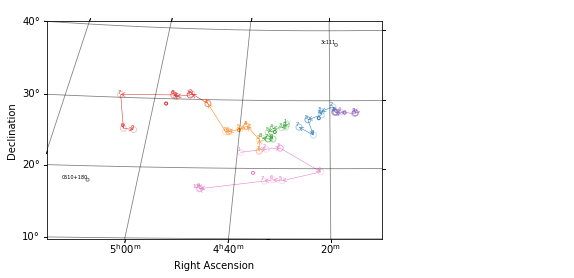

In [50]:
from matplotlib.patches import ConnectionPatch
a1 = ['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau']
s1 = [3, 3, 3, 3, 3, 3, 18, 3, 9]
a2 = ['DS_Tau', 'GO_Tau', 'CIDA-7', 'IC_2087_IR', 'HV_Tau', 'DO_Tau', 'DN_Tau', 'HO_Tau']
s2 = [3, 3, 12, 3, 9, 3, 3, 10]
a3 = ['AA_Tau', 'GK_Tau', 'FY_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau']
s3 = [3, 18, 9, 3, 3, 3, 3, 6]
a4 = ['FV_Tau', 'FT_Tau','IP_Tau', 'DE_Tau', 'RY_Tau', 'BP_Tau', 'CoKu_Tau_1']
s4 = [9, 3, 15, 3, 3, 3, 12]
a5 = ['CoKu_Tau_1', 'V892_Tau', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau']
s5 = [6, 3, 9, 3, 3, 5, 18]
a6 = ['DR_Tau', 'Haro_6-37', 'DQ_Tau', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'LkCa_15',]
s6 = [3, 3, 3, 3, 3, 3, 3, 18, 3, 3]

a = [a1, a2, a3, a4, a5, a6]
s = [s1, s2, s3, s4, s5, s6]
p = []

print(sum(s1), sum(s2), sum(s3), sum(s4), sum(s5), sum(s6))

for i in range(6):
    l = []
    for j in range(len(a[i])):
        id = np.where(targ == a[i][j])[0][0]
        l.append(id)
    p.append(l)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '10d00m00s', frame='icrs')
cr = SkyCoord('05h30m00s', '40d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)

c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']

for i in range(6):
    a = 0
    b = 0
    lx = 0 
    ly = 0
    for j in range(len(p[i])):
    #    O = SphericalCircle((x[p[i][j]] * u.deg, y[p[i][j]] * u.deg), 7* u.degree, 
    #                        transform=ax.get_transform('icrs'), facecolor = c, edgecolor = c)
    #    ax.add_patch(O)
        ax.scatter(x[p[i][j]], y[p[i][j]], marker = 'o', edgecolor = c[i], facecolor='none', alpha=round(math.sqrt(float(s[i][j])/48), 2))
        ax.annotate(len(p[i])-j, xy = (x[p[i][j]], y[p[i][j]]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5, color = c[i])
        if (lx != 0):
            con = ConnectionPatch((x[p[i][j]], y[p[i][j]]), (lx, ly), coordsA = "data", arrowstyle="->", edgecolor=c[i], linewidth=0.5)
            ax.add_artist(con)
        lx = x[p[i][j]]
        ly = y[p[i][j]]
        a = a + RA[p[i][j]]
        b = b + Dec[p[i][j]]
    coor = SkyCoord(a/len(p[i]), b/len(p[i]), frame='icrs', unit='deg')
    print(coor.to_string('hmsdms'))    
#    al = wcs.all_world2pix(a/len(p[i]), b/len(p[i]), 0)[0]
#    bl = wcs.all_world2pix(a/len(p[i]), b/len(p[i]), 0)[1]
    ax.scatter(a/len(p[i]), b/len(p[i]), transform=ax.get_transform('icrs'),  marker = '.', edgecolor = c[i], facecolor='none')
#    ax.annotate(i+1, xy = (a/len(p[i]), b/len(p[i])), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', 
#                size = 5, color = c[i])

cal0 = SkyCoord('05h10m02.369s', '18d00m41.58s', frame='icrs')
ax.scatter(cal0.ra.deg, cal0.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('0510+180', xy = (wcs.all_world2pix(cal0.ra.deg, cal0.dec.deg, 0)[0], wcs.all_world2pix(cal0.ra.deg, cal0.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
cal1 = SkyCoord('04h18m21.277s', '38d01m35.80s', frame='icrs')
ax.scatter(cal1.ra.deg, cal1.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('3c111', xy = (wcs.all_world2pix(cal1.ra.deg, cal1.dec.deg, 0)[0], wcs.all_world2pix(cal1.ra.deg, cal1.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
cal = SkyCoord('03h19m48.160s', '41d30m42.10s', frame='icrs')
ax.scatter(cal.ra.deg, cal.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('3c84', xy = (wcs.all_world2pix(cal.ra.deg, cal.dec.deg, 0)[0], wcs.all_world2pix(cal.ra.deg, cal.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)


ax.invert_xaxis()
ax.coords.grid(True, color='black',ls='solid',alpha=0.5)
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_17_400_1.png', dpi=1000)
plt.plot()

48 49 48 48 48 48
04h55m44.1845s +28d53m52.115s
04h38m12.7432s +24d59m18.913s
04h31m30.3849s +25d36m23.4162s
04h23m02.3978s +27d09m31.8192s
04h16m42.604s +28d21m49.4041s
04h36m16.8502s +19d21m04.6441s


[]

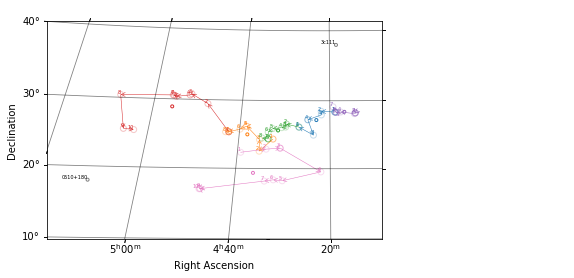

In [51]:
a1 = ['V836_Tau', 'CIDA-9', 'RW_Aur', 'SU_Aur', 'AB_Aur', 'GM_Aur', 'Haro_6-39', 'UY_Aur', 'DS_Tau', 'CIDA-7']
s1 = [3, 4, 3, 4, 3, 3, 6, 4, 4, 14]
a2 = ['GO_Tau', 'CIDA-7', 'IC_2087_IR', 'HV_Tau', 'DO_Tau', 'DN_Tau', 'HO_Tau', 'FY_Tau']
s2 = [3, 7, 3, 3, 3, 3, 3, 12, 12]
a3 = ['AA_Tau', 'GK_Tau', 'DL_Tau', 'UZ_Tau', 'DK_Tau', 'IQ_Tau', 'DH_Tau', 'FV_Tau']
s3 = [3, 21, 3, 3, 3, 3, 6, 6]
a4 = ['FV_Tau', 'FT_Tau', 'IP_Tau', 'DE_Tau', 'RY_Tau', 'CoKu_Tau_1']
s4 = [6, 3, 12, 3, 3, 21]
a5 = ['BP_Tau', 'V892_Tau', 'DD_Tau', 'CY_Tau', '04113+2758', 'CW_Tau', 'FM_Tau']
s5 = [3, 3, 12, 3, 3, 3, 21]
a6 = ['DR_Tau', 'Haro_6-37', 'DQ_Tau', 'DM_Tau', 'V710_Tau', 'UX_Tau', 'T_Tau', '04278+2253', 'CI_Tau', 'LkCa_15']
s6 = [3, 3, 3, 3, 3, 3, 3, 21, 3, 3]

a = [a1, a2, a3, a4, a5, a6]
s = [s1, s2, s3, s4, s5, s6]
p = []

print(sum(s1), sum(s2), sum(s3), sum(s4), sum(s5), sum(s6))

for i in range(6):
    l = []
    for j in range(len(a[i])):
        id = np.where(targ == a[i][j])[0][0]
        l.append(id)
    p.append(l)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

cl = SkyCoord('04h10m00s', '10d00m00s', frame='icrs')
cr = SkyCoord('05h30m00s', '40d00m00s', frame='icrs')
clx = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[0])
cly = float(wcs.all_world2pix(cl.ra.deg, cl.dec.deg, 0)[1])
crx = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[0])
cry = float(wcs.all_world2pix(cr.ra.deg, cr.dec.deg, 0)[1])
ax.set_xlim(clx, crx)
ax.set_ylim(cly, cry)


c = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink']

for i in range(6):
    a = 0
    b = 0
    lx = 0 
    ly = 0
    for j in range(len(p[i])):
    #    O = SphericalCircle((x[p[i][j]] * u.deg, y[p[i][j]] * u.deg), 7* u.degree, 
    #                        transform=ax.get_transform('icrs'), facecolor = c, edgecolor = c)
    #    ax.add_patch(O)
        ax.scatter(x[p[i][j]], y[p[i][j]], marker = 'o', edgecolor = c[i], facecolor='none', alpha=round(math.sqrt(float(s[i][j])/48), 2))
        ax.annotate(len(p[i])-j, xy = (x[p[i][j]], y[p[i][j]]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5, color = c[i])
        if (lx != 0):
            con = ConnectionPatch((x[p[i][j]], y[p[i][j]]), (lx, ly), coordsA = "data", arrowstyle="->", edgecolor=c[i], linewidth=0.5)
            ax.add_artist(con)
        lx = x[p[i][j]]
        ly = y[p[i][j]]
        a = a + RA[p[i][j]]
        b = b + Dec[p[i][j]]
    coor = SkyCoord(a/len(p[i]), b/len(p[i]), frame='icrs', unit='deg')
    print(coor.to_string('hmsdms'))
#    al = wcs.all_world2pix(a/len(p[i]), b/len(p[i]), 0)[0]
#    bl = wcs.all_world2pix(a/len(p[i]), b/len(p[i]), 0)[1]
    ax.scatter(a/len(p[i]), b/len(p[i]), transform=ax.get_transform('icrs'),  marker = '.', edgecolor = c[i], facecolor='none')
#    ax.annotate(i+1, xy = (a/len(p[i]), b/len(p[i])), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', 
#                size = 5, color = c[i])
cal0 = SkyCoord('05h10m02.369s', '18d00m41.58s', frame='icrs')
ax.scatter(cal0.ra.deg, cal0.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('0510+180', xy = (wcs.all_world2pix(cal0.ra.deg, cal0.dec.deg, 0)[0], wcs.all_world2pix(cal0.ra.deg, cal0.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
cal1 = SkyCoord('04h18m21.277s', '38d01m35.80s', frame='icrs')
ax.scatter(cal1.ra.deg, cal1.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('3c111', xy = (wcs.all_world2pix(cal1.ra.deg, cal1.dec.deg, 0)[0], wcs.all_world2pix(cal1.ra.deg, cal1.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)
cal = SkyCoord('03h19m48.160s', '41d30m42.10s', frame='icrs')
ax.scatter(cal.ra.deg, cal.dec.deg, transform=ax.get_transform('icrs'),  marker = '.', edgecolor = 'gray', facecolor='none')
ax.annotate('3c84', xy = (wcs.all_world2pix(cal.ra.deg, cal.dec.deg, 0)[0], wcs.all_world2pix(cal.ra.deg, cal.dec.deg, 0)[1]), xytext = (0, 0), textcoords = 'offset points', ha='right', va='bottom', size = 5)


ax.invert_xaxis()
ax.coords.grid(True, color='black',ls='solid',alpha=0.5)
ax.coords[0].set_axislabel('Right Ascension')
ax.coords[1].set_axislabel('Declination')
plt.savefig(name+'_17_230_1.png', dpi=1000)
plt.plot()